In [2]:
%pip install --q pandas
%pip install --q numpy
%pip install --q matplotlib
%pip install --q seaborn
%pip install --q scikit-learn
%pip install --q xgboost

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Before Merging

In [2]:
def load_and_explore_data(projects_path, outcomes_path):
    projects_df = pd.read_csv(projects_path)
    outcomes_df = pd.read_csv(outcomes_path)

    #basic information
    print("Projects Dataset shape:", projects_df.shape)
    print(f"\nColumn names ({len(projects_df.columns)}):")
    print(projects_df.columns.tolist())
    print("\nFirst few rows:")
    display(projects_df.head(3).T)

    print("Outcomes Dataset shape:", outcomes_df.shape)
    print(f"\nColumn names ({len(outcomes_df.columns)}):")
    print(outcomes_df.columns.tolist())
    print("\nFirst few rows:")
    display(outcomes_df.head(3).T)

    #looking for duplicates before merging
    print(f"Projects duplicates: {projects_df.duplicated().sum()}")
    print(f"Outcomes duplicates: {outcomes_df.duplicated().sum()}")

    #missing values before merging
    print("\nPercentage of missing values in projects_df:")
    print((projects_df.isnull().mean() * 100).round(2).sort_values(ascending=False))
    print("\nPercentage of missing values in outcomes_df:")
    print((outcomes_df.isnull().mean() * 100).round(2).sort_values(ascending=False))
    #can drop secondary_focus_subject and secondary_focus_area after merging, having 30% data missing

    print("\n--- Data Types in projects_df ---")
    print(projects_df.dtypes.sort_values())
    print("\n--- Data Types in outcomes_df ---")
    print(outcomes_df.dtypes.sort_values())

    return projects_df, outcomes_df

In [4]:
projects_path = 'Datasets/projects.csv'
outcomes_path = 'Datasets/outcomes.csv'

projects_df, outcomes_df = load_and_explore_data(projects_path, outcomes_path)

Projects Dataset shape: (664098, 35)

Column names (35):
['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid', 'school_latitude', 'school_longitude', 'school_city', 'school_state', 'school_zip', 'school_metro', 'school_district', 'school_county', 'school_charter', 'school_magnet', 'school_year_round', 'school_nlns', 'school_kipp', 'school_charter_ready_promise', 'teacher_prefix', 'teacher_teach_for_america', 'teacher_ny_teaching_fellow', 'primary_focus_subject', 'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area', 'resource_type', 'poverty_level', 'grade_level', 'fulfillment_labor_materials', 'total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached', 'eligible_double_your_impact_match', 'eligible_almost_home_match', 'date_posted']

First few rows:


,0,1,2
projectid,316ed8fb3b81402ff6ac8f721bb31192,90de744e368a7e4883223ca49318ae30,32943bb1063267de6ed19fc0ceb4b9a7
teacher_acctid,42d43fa6f37314365d08692e08680973,864eb466462bf704bf7a16a585ef296a,37f85135259ece793213aca9d8765542
schoolid,c0e6ce89b244764085691a1b8e28cb81,d711e47810900c96f26a5d0be30c446d,665c3613013ba0a66e3a2a26b89f1b68
school_ncesid,63627006187.0,483702008193.0,410327000109.0
school_latitude,36.57634,32.911179,45.166039
school_longitude,-119.608713,-96.72364,-122.414576
school_city,Selma,Dallas,Colton
school_state,CA,TX,OR
school_zip,93662.0,75243.0,97017.0
school_metro,NaN,urban,rural


Outcomes Dataset shape: (619326, 12)

Column names (12):
['projectid', 'is_exciting', 'at_least_1_teacher_referred_donor', 'fully_funded', 'at_least_1_green_donation', 'great_chat', 'three_or_more_non_teacher_referred_donors', 'one_non_teacher_referred_donor_giving_100_plus', 'donation_from_thoughtful_donor', 'great_messages_proportion', 'teacher_referred_count', 'non_teacher_referred_count']

First few rows:


,0,1,2
projectid,ffffc4f85b60efc5b52347df489d0238,ffffac55ee02a49d1abc87ba6fc61135,ffff97ed93720407d70a2787475932b0
is_exciting,f,f,f
at_least_1_teacher_referred_donor,NaN,f,f
fully_funded,f,t,t
at_least_1_green_donation,NaN,t,t
great_chat,f,f,t
three_or_more_non_teacher_referred_donors,NaN,t,t
one_non_teacher_referred_donor_giving_100_plus,NaN,f,t
donation_from_thoughtful_donor,NaN,f,f
great_messages_proportion,NaN,57.0,100.0


Projects duplicates: 0
Outcomes duplicates: 0

Percentage of missing values in projects_df:
secondary_focus_subject                   31.30
secondary_focus_area                      31.30
school_metro                              12.33
school_ncesid                              6.44
fulfillment_labor_materials                5.28
school_district                            0.14
students_reached                           0.02
primary_focus_subject                      0.01
primary_focus_area                         0.01
resource_type                              0.01
poverty_level                              0.00
projectid                                  0.00
grade_level                                0.00
teacher_teach_for_america                  0.00
total_price_excluding_optional_support     0.00
total_price_including_optional_support     0.00
eligible_double_your_impact_match          0.00
eligible_almost_home_match                 0.00
teacher_ny_teaching_fellow                 0

### Merging Datasets and Cleaning + Preprocessing

In [5]:
def merge_and_clean(projects_df, outcomes_df):
    df = pd.merge(projects_df, outcomes_df[['projectid', 'fully_funded']], on='projectid', how='inner')
    print(f"\nMerged dataset shape: {df.shape}") #lost 44772 rows from projects_df @ merging

    # Dropped columns: not needed (such as longitude/ncesid) + redundant such as 'secondary focus subject'

    columns_to_drop = [
        'school_ncesid', 'school_latitude', 'school_longitude', 'school_city',
        'school_state', 'school_district', 'school_county','teacher_teach_for_america','teacher_ny_teaching_fellow',
        'secondary_focus_subject', 'secondary_focus_area', 'primary_focus_subject'
    ]
    df.drop(columns=columns_to_drop, inplace=True)
    return df

In [6]:
def handle_missing_values(df):
    '''     
    Imputes the missing values in categorical variables with 
    mode and numerical values with the mean
    '''

    print("Missing values in the Merged Dataset:\n")
    print(df.isnull().sum())
    
    cat_cols = ['school_zip', 'school_metro', 'primary_focus_area', 'resource_type', 'grade_level']
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    num_cols = ['fulfillment_labor_materials', 'students_reached']
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())

    print("\nMissing values after imputation:\n")
    print(df.isnull().sum())
    return df


In [7]:
def preprocess_data(df, columns_to_encode):

    """
    Preprocess data: 
    - handling bool columns
    - one-hot encoding for specified columns
    - handling ID columns numeric conversion
    - handling date column
    """   
    # Create a copy to avoid modifying original dataframe
    processed_df = df.copy()

    # One-hot encode specified columns
    print("Starting preprocessing...")
    
    for column in columns_to_encode:
        if column in processed_df.columns:
            # Create dummy variables
            dummies = pd.get_dummies(
                processed_df[column], 
                prefix=column.lower().replace(' ', '_'),
                drop_first=True
            ).astype(int)
            # Drop original column and add encoded columns
            processed_df.drop(column, axis=1, inplace=True)
            processed_df = pd.concat([processed_df, dummies], axis=1)
            print(f"Encoded {column} into {dummies.shape[1]} dummy variables")

    #coverting boolean columns
    bool_columns = [
        'fully_funded', 'school_charter', 'school_magnet', 'school_year_round',
        'school_nlns', 'school_kipp', 'school_charter_ready_promise',
        'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
        'eligible_double_your_impact_match', 'eligible_almost_home_match'
    ]
    for col in bool_columns:
        if col in processed_df.columns:
            processed_df[col] = processed_df[col].map({'t': 1, 'f': 0})

    # ID columns (simple numeric conversion) -> using factorize to keep it unique: did it for sake of cleaning
    id_columns = ['schoolid', 'teacher_acctid']
    for col in id_columns:
        if col in processed_df.columns:
            processed_df[col], _ = pd.factorize(processed_df[col])

    # Convert date column to datetime, TODO: not sure if needed but did for the sake of cleaning
    if 'date_posted' in processed_df.columns:
        processed_df['date_posted'] = pd.to_datetime(processed_df['date_posted'], errors='coerce')
        processed_df['days_since_posted'] = (pd.to_datetime('today') - processed_df['date_posted']).dt.days 
      #  processed_df.drop(columns=['date_posted'], inplace=True) #not needed


        return processed_df

In [8]:
def plot_correlation_matrix(df, drop_columns=['projectid']):
    correlation_df = df.drop(columns=drop_columns, errors='ignore')
    correlation_matrix = correlation_df.corr()
    #print(correlation_matrix)

    plt.figure(figsize=(20,15))
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, center=0)
    plt.title("Correlation Matrix", fontsize=16)
    plt.show()

    return correlation_matrix

In [9]:
#merge & clean
merged_df = merge_and_clean(projects_df, outcomes_df)


Merged dataset shape: (619326, 36)


In [10]:
#missing values 
merged_df = handle_missing_values(merged_df)

Missing values in the Merged Dataset:

projectid                                     0
teacher_acctid                                0
schoolid                                      0
school_zip                                    4
school_metro                              75488
school_charter                                0
school_magnet                                 0
school_year_round                             0
school_nlns                                   0
school_kipp                                   0
school_charter_ready_promise                  0
teacher_prefix                                0
primary_focus_area                           36
resource_type                                43
poverty_level                                 0
grade_level                                   7
fulfillment_labor_materials               35082
total_price_excluding_optional_support        0
total_price_including_optional_support        0
students_reached                            144
e

In [11]:
print(merged_df.dtypes)

projectid                                  object
teacher_acctid                             object
schoolid                                   object
school_zip                                float64
school_metro                               object
school_charter                             object
school_magnet                              object
school_year_round                          object
school_nlns                                object
school_kipp                                object
school_charter_ready_promise               object
teacher_prefix                             object
primary_focus_area                         object
resource_type                              object
poverty_level                              object
grade_level                                object
fulfillment_labor_materials               float64
total_price_excluding_optional_support    float64
total_price_including_optional_support    float64
students_reached                          float64


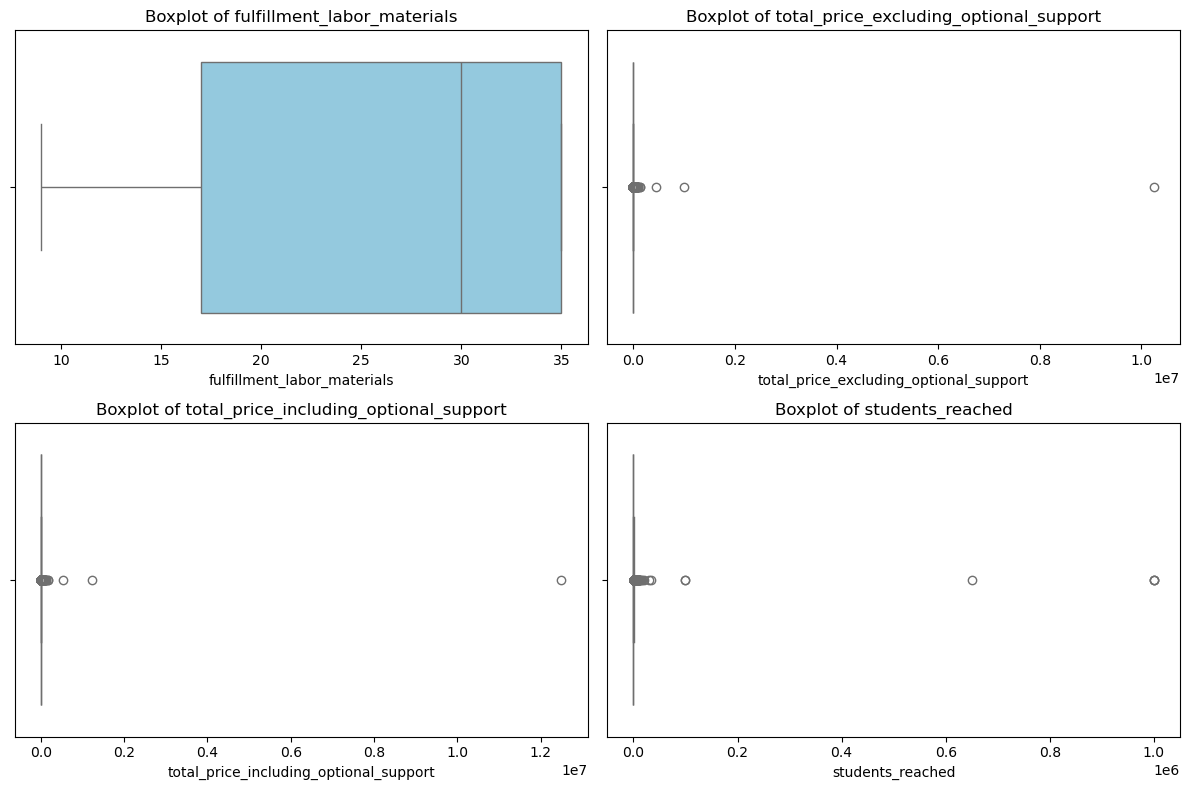

In [12]:

# numeric columns to plot to get an idea about outliers:
num_cols = [
    'fulfillment_labor_materials', 
    'total_price_excluding_optional_support', 
    'total_price_including_optional_support', 
    'students_reached'
]

# Set the size of the plots
plt.figure(figsize=(12, 8))

# Create boxplots for each numerical column
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns, iterate for each plot
    sns.boxplot(x=merged_df[col], color="skyblue", showfliers=True)  # showfliers to highlight outliers
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [13]:
print("Original shape:", merged_df.shape)

outlier_df = merged_df.copy()

# I first tried using IQR to remove outliers, but it was filtering out too many values that actually seemed reasonable,
# especially since things like cost and number of students can vary a lot between schools.
# So instead, I decided to just drop the negative values since costs and students can't be negative,
# and then I manually removed a few extremely large values that looked like data entry errors (like millions of dollars or students).

for col in ['fulfillment_labor_materials', 'total_price_excluding_optional_support', 
            'total_price_including_optional_support', 'students_reached']:
    outlier_df = outlier_df[outlier_df[col] >= 0]

# Define upper bounds based on manual inspection of boxplots
upper_bounds = {
    'total_price_excluding_optional_support': 5000,
    'total_price_including_optional_support': 6000,
    'students_reached': 1000
}

# Drop rows above these thresholds
for col, max_val in upper_bounds.items():
    outlier_df = outlier_df[outlier_df[col] <= max_val]

print(f"Shape after capping extreme outliers: {outlier_df.shape}")


Original shape: (619326, 24)
Shape after capping extreme outliers: (617010, 24)


In [14]:
# Apply preprocessing with specific columns

# Columns to encode
columns_to_encode = ['primary_focus_area', 'school_metro', 'grade_level',
        'poverty_level', 'resource_type', 'teacher_prefix', 'school_metro']

processed_df = preprocess_data(outlier_df, columns_to_encode)

# Display sample of processed data
print("\nSample of processed data (first 5 rows):")
display(processed_df.head())
    
# Show shape before and after
print(f"\nOriginal shape: {outlier_df.shape}")
print(f"Processed shape: {processed_df.shape}")

Starting preprocessing...
Encoded primary_focus_area into 6 dummy variables
Encoded school_metro into 2 dummy variables
Encoded grade_level into 3 dummy variables
Encoded poverty_level into 3 dummy variables
Encoded resource_type into 5 dummy variables
Encoded teacher_prefix into 4 dummy variables

Sample of processed data (first 5 rows):


,projectid,teacher_acctid,schoolid,school_zip,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,...,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,teacher_prefix_Mr.,teacher_prefix_Mr. & Mrs.,teacher_prefix_Mrs.,teacher_prefix_Ms.,days_since_posted
0,62526d85d2a1818432d03d600969e99c,0,0,60103.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,4139
1,33d59ac771b80222ad63ef0f4ac47ade,1,1,83402.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,4139
2,1a3aaeffc56dd2a421e37d8298024c0a,2,2,3038.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,4139
3,33aa19ee4da4c5adf47d0dfb84fab5ef,3,3,23224.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,4139
4,e31c0ea8b68f404699dfb0d39e9bc99b,4,4,60613.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,4139



Original shape: (617010, 24)
Processed shape: (617010, 42)


In [15]:
processed_df = processed_df.sort_values('date_posted')

In [16]:
print(processed_df.columns)

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_zip',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise',
       'fulfillment_labor_materials', 'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'fully_funded', 'primary_focus_area_Health & Sports',
       'primary_focus_area_History & Civics',
       'primary_focus_area_Literacy & Language',
       'primary_focus_area_Math & Science',
       'primary_focus_area_Music & The Arts',
       'primary_focus_area_Special Needs', 'school_metro_suburban',
       'school_metro_urban', 'grade_level_Grades 6-8',
       'grade_level_Grades 9-12', 'grade_level_Grades PreK-2',
       'poverty_level_highest poverty', 'poverty_level_low poverty',
       'poverty_level_moderate poverty', 'resource_type_Other',
 

In [17]:
#dropping these after looking at correlation once
drop_these = [
    'projectid',
    'teacher_acctid',
    'schoolid', 
    'date_posted'
]

processed_df = processed_df.drop(columns=drop_these)


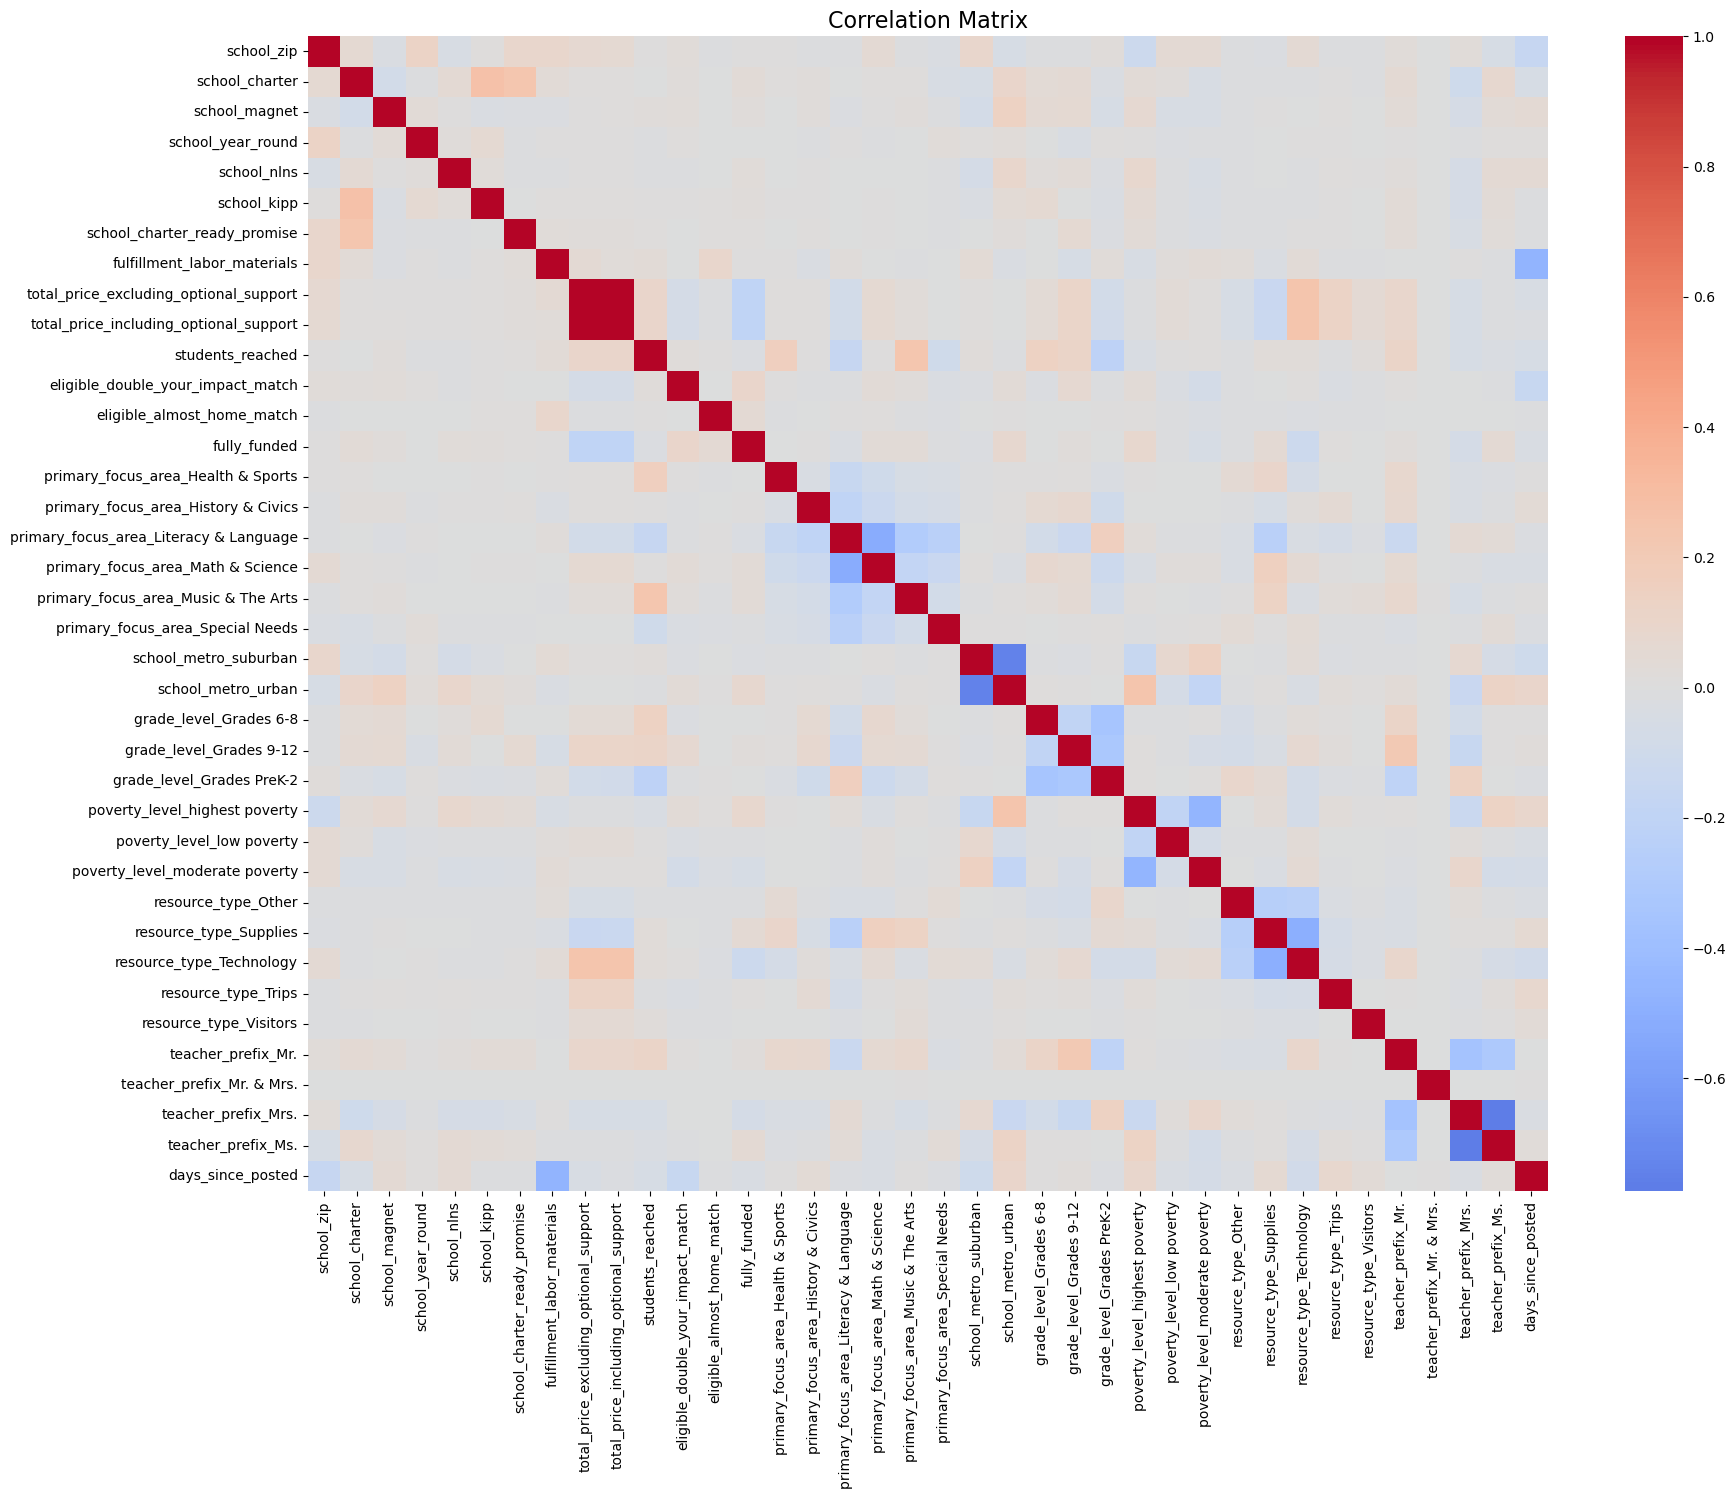

In [18]:
#correlation matrix 
correlation_matrix = plot_correlation_matrix(processed_df)

In [19]:
processed_df = processed_df.drop(columns = ['total_price_excluding_optional_support'])
#negative correlation expected among the variables which were hot-encoded

### After Cleaning

In [20]:
print(processed_df.columns)

Index(['school_zip', 'school_charter', 'school_magnet', 'school_year_round',
       'school_nlns', 'school_kipp', 'school_charter_ready_promise',
       'fulfillment_labor_materials', 'total_price_including_optional_support',
       'students_reached', 'eligible_double_your_impact_match',
       'eligible_almost_home_match', 'fully_funded',
       'primary_focus_area_Health & Sports',
       'primary_focus_area_History & Civics',
       'primary_focus_area_Literacy & Language',
       'primary_focus_area_Math & Science',
       'primary_focus_area_Music & The Arts',
       'primary_focus_area_Special Needs', 'school_metro_suburban',
       'school_metro_urban', 'grade_level_Grades 6-8',
       'grade_level_Grades 9-12', 'grade_level_Grades PreK-2',
       'poverty_level_highest poverty', 'poverty_level_low poverty',
       'poverty_level_moderate poverty', 'resource_type_Other',
       'resource_type_Supplies', 'resource_type_Technology',
       'resource_type_Trips', 'resource_type_Vi

In [21]:
processed_df['fully_funded'].value_counts(normalize = True)

fully_funded
1    0.696289
0    0.303711
Name: proportion, dtype: float64

In [32]:
features = [
    'school_zip', 'school_charter', 'school_magnet', 'school_year_round',
       'school_nlns', 'school_kipp', 'school_charter_ready_promise',
       'fulfillment_labor_materials', 'total_price_including_optional_support',
       'students_reached', 'eligible_double_your_impact_match',
       'eligible_almost_home_match',
       'primary_focus_area_Health & Sports',
       'primary_focus_area_History & Civics',
       'primary_focus_area_Literacy & Language',
       'primary_focus_area_Math & Science',
       'primary_focus_area_Music & The Arts',
       'primary_focus_area_Special Needs', 'school_metro_urban',
       'grade_level_Grades 6-8', 'grade_level_Grades 9-12',
       'poverty_level_highest poverty', 'poverty_level_moderate poverty',
       'resource_type_Supplies', 'resource_type_Technology',
       'resource_type_Trips', 'resource_type_Visitors', 'teacher_prefix_Mr.',
       'teacher_prefix_Mrs.', 'teacher_prefix_Ms.', 'days_since_posted']


start_index = 7
target_column = 'fully_funded'
time_column = 'date_posted' 

features_to_use = [f for f in features[start_index:] if f != target_column and f != time_column]

In [33]:

X_cv = processed_df[features_to_use].copy()
y_cv = processed_df[target_column].copy()


X_cv = X_cv.select_dtypes(exclude=['object', 'bool', 'datetime64[ns]'])

print(f"Shape of X_cv (features for CV): {X_cv.shape}")
print(f"Shape of y_cv (target for CV): {y_cv.shape}")
print("\nFeatures being used in X_cv:")
print(X_cv.columns.tolist())

Shape of X_cv (features for CV): (617010, 24)
Shape of y_cv (target for CV): (617010,)

Features being used in X_cv:
['fulfillment_labor_materials', 'total_price_including_optional_support', 'students_reached', 'eligible_double_your_impact_match', 'eligible_almost_home_match', 'primary_focus_area_Health & Sports', 'primary_focus_area_History & Civics', 'primary_focus_area_Literacy & Language', 'primary_focus_area_Math & Science', 'primary_focus_area_Music & The Arts', 'primary_focus_area_Special Needs', 'school_metro_urban', 'grade_level_Grades 6-8', 'grade_level_Grades 9-12', 'poverty_level_highest poverty', 'poverty_level_moderate poverty', 'resource_type_Supplies', 'resource_type_Technology', 'resource_type_Trips', 'resource_type_Visitors', 'teacher_prefix_Mr.', 'teacher_prefix_Mrs.', 'teacher_prefix_Ms.', 'days_since_posted']


In [4]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb 
import numpy as np
import pandas as pd
import time
from IPython.display import display

In [5]:
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

In [36]:
# Models and Parameter Grids
param_grids = {
    'Logistic Regression (Balanced)': {
        'model': LogisticRegression(max_iter=1000, random_state=42, solver='liblinear', class_weight='balanced'),
        'params': {
            'C': [0.1, 1.0, 10.0],
            'penalty': ['l1', 'l2']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100], 
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 4]
        }
    },
     'XGBoost': { 
         'model': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
         'params': {
             'n_estimators': [50, 100],
             'learning_rate': [0.05, 0.1],
             'max_depth': [3, 4]
         }
     }
}


models_no_tune = {
    'Naive Bayes': GaussianNB()
}

# Metric for Comparison
scoring_metric = 'roc_auc' 

# Results
grid_search_results = {}
no_tune_results = {}

print("\nModels and Parameter Grids for Tuning:")
for name in param_grids.keys():
    print(f"- {name}")
print("\nModels for direct evaluation:")
for name in models_no_tune.keys():
    print(f"- {name}")


Models and Parameter Grids for Tuning:
- Logistic Regression (Balanced)
- Gradient Boosting
- XGBoost

Models for direct evaluation:
- Naive Bayes


In [ ]:
# Grid Search with Temporal Cross-Validation

print(f"Metric: {scoring_metric}")

for model_name, config in param_grids.items():
    print(f"\nTuning model: {model_name}...")
    start_time = time.time()

    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=tscv,
        scoring=scoring_metric,
        n_jobs=-1, 
        verbose=1
    )
    grid_search.fit(X_cv, y_cv)

    print(f"  Best Parameters: {grid_search.best_params_}")
    print(f"  Best CV Score ({scoring_metric}): {grid_search.best_score_:.4f}")

    # Store results
    grid_search_results[model_name] = {
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_,
        'best_estimator': grid_search.best_estimator_
    }

Metric: roc_auc

Tuning model: Logistic Regression (Balanced)...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
  Best Parameters: {'C': 10.0, 'penalty': 'l1'}
  Best CV Score (roc_auc): 0.6768

Tuning model: Gradient Boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
  Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}
  Best CV Score (roc_auc): 0.6806

Tuning model: XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:40:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:40:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:40:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:40:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

  Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
  Best CV Score (roc_auc): 0.6821


In [39]:
# Models without Tuning
for model_name, model in models_no_tune.items():
    print(f"\nEvaluating model: {model_name}")

    fold_scores = {'roc_auc': [], 'precision': [], 'recall': []}
    fold = 1

    for train_index, test_index in tscv.split(X_cv):
        print(f"  Fold {fold}/{n_splits}...")
        X_train_fold, X_test_fold = X_cv.iloc[train_index], X_cv.iloc[test_index]
        y_train_fold, y_test_fold = y_cv.iloc[train_index], y_cv.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)

        y_pred_fold = model.predict(X_test_fold)
        try:
            y_proba_fold = model.predict_proba(X_test_fold)[:, 1]
            roc_auc = roc_auc_score(y_test_fold, y_proba_fold)
        except AttributeError:
            roc_auc = np.nan
        except Exception as e:
            print(f"Error ROC AUC for fold {fold}: {e}")
            roc_auc = np.nan

        precision = precision_score(y_test_fold, y_pred_fold, zero_division=0)
        recall = recall_score(y_test_fold, y_pred_fold, zero_division=0)

        fold_scores['roc_auc'].append(roc_auc)
        fold_scores['precision'].append(precision)
        fold_scores['recall'].append(recall)

        print(f"    Fold {fold} Metrics - ROC AUC: {roc_auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
        print("-" * 40)

        fold += 1

    avg_roc_auc = np.nanmean(fold_scores['roc_auc'])
    avg_precision = np.mean(fold_scores['precision'])
    avg_recall = np.mean(fold_scores['recall'])

    print(f"  Average Scores - ROC AUC: {avg_roc_auc:.4f}, Precision: {avg_precision:.4f}, Recall: {avg_recall:.4f}")

    no_tune_results[model_name] = {
        'avg_roc_auc': avg_roc_auc,
        'avg_precision': avg_precision,
        'avg_recall': avg_recall
    }



Evaluating model: Naive Bayes
  Fold 1/5...
    Fold 1 Metrics - ROC AUC: 0.5851, Precision: 0.7365, Recall: 0.6701
----------------------------------------
  Fold 2/5...
    Fold 2 Metrics - ROC AUC: 0.6363, Precision: 0.7442, Recall: 0.7735
----------------------------------------
  Fold 3/5...
    Fold 3 Metrics - ROC AUC: 0.6148, Precision: 0.7409, Recall: 0.8008
----------------------------------------
  Fold 4/5...
    Fold 4 Metrics - ROC AUC: 0.6172, Precision: 0.7620, Recall: 0.7714
----------------------------------------
  Fold 5/5...
    Fold 5 Metrics - ROC AUC: 0.6236, Precision: 0.7475, Recall: 0.7476
----------------------------------------
  Average Scores - ROC AUC: 0.6154, Precision: 0.7462, Recall: 0.7527


In [40]:
print("Average Performance Across Folds (Sorted by ROC AUC)")

summary_data_gs = []
for name, result in grid_search_results.items():
    summary_data_gs.append({
        'Model': name,
        'Avg ROC AUC': result['best_score'],
        'Best Params': result['best_params']
    })


summary_data_nt = []
for name, result in no_tune_results.items():
     summary_data_nt.append({
        'Model': name,
        'Avg ROC AUC': result['avg_roc_auc'],
        'Avg Precision': result['avg_precision'], 
        'Avg Recall': result['avg_recall'],
        'Best Params': 'N/A (No Tuning)'
    })

summary_df_gs = pd.DataFrame(summary_data_gs)
summary_df_nt = pd.DataFrame(summary_data_nt)

print("\nGrid Searched Models (Primary Metric: ROC AUC):")
display(summary_df_gs.sort_values(by='Avg ROC AUC', ascending=False))

print("\nNon-Tuned Models (Evaluated with Temporal CV):")
display(summary_df_nt.sort_values(by='Avg ROC AUC', ascending=False))

Average Performance Across Folds (Sorted by ROC AUC)

Grid Searched Models (Primary Metric: ROC AUC):


,Model,Avg ROC AUC,Best Params
2,XGBoost,0.682058,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
1,Gradient Boosting,0.680603,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est..."
0,Logistic Regression (Balanced),0.676802,"{'C': 10.0, 'penalty': 'l1'}"



Non-Tuned Models (Evaluated with Temporal CV):


,Model,Avg ROC AUC,Avg Precision,Avg Recall,Best Params
0,Naive Bayes,0.61541,0.746193,0.752691,N/A (No Tuning)
